In [1]:
import sys
import scGCO
sys.path.append("D:/Graduate/singlecell/scGCOs/Simulation_Pattern/")
from simulation import *
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

D:\Anaconda3\envs\spatial\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
sample_info=pd.read_csv("../processed_data/Rep11_MOB_info_scgco.csv",index_col=0)

In [3]:
tissue_mat=np.load("../../sim_MOB_Rep11_0906/processed_data/tissue_mat.npy")
tissue_mat=tissue_mat.astype("int")

In [4]:
sample_info

,x,y,total_counts
16.92x9.015,16.920,9.015,18787
16.945x11.075,16.945,11.075,36989
16.97x10.118,16.970,10.118,12469
16.939x12.132,16.939,12.132,22703
16.949x13.055,16.949,13.055,18641
...,...,...,...
23.124x24.046,23.124,24.046,28765
21.01x23.944,21.010,23.944,25616
22.053x23.962,22.053,23.962,27325
27.018x20.088,27.018,20.088,16821


In [8]:
def get_exp(pattern,exp_diff,noise=0.2):
    high_exp = 2
    low_exp = high_exp - exp_diff
    uu = [low_exp,high_exp]
    exp = np.array([uu[i] for i in pattern]) + np.random.normal(0,noise,len(pattern))
    exp = np.clip(exp,0,None)
    return exp

def find_mixture_2_new(data, max_iters=5):
    gmm = mixture.GaussianMixture(n_components = 2)
    gmm.fit(data.reshape(-1,1))
    iters = 0
    while gmm.covariances_[0]/gmm.covariances_[1] >1e3 or gmm.covariances_[0]/gmm.covariances_[1] <1e-3 or iters <= max_iters:
        gmm = mixture.GaussianMixture(n_components = 2)
        gmm.fit(data.reshape(-1,1))
        iters +=1
    return gmm

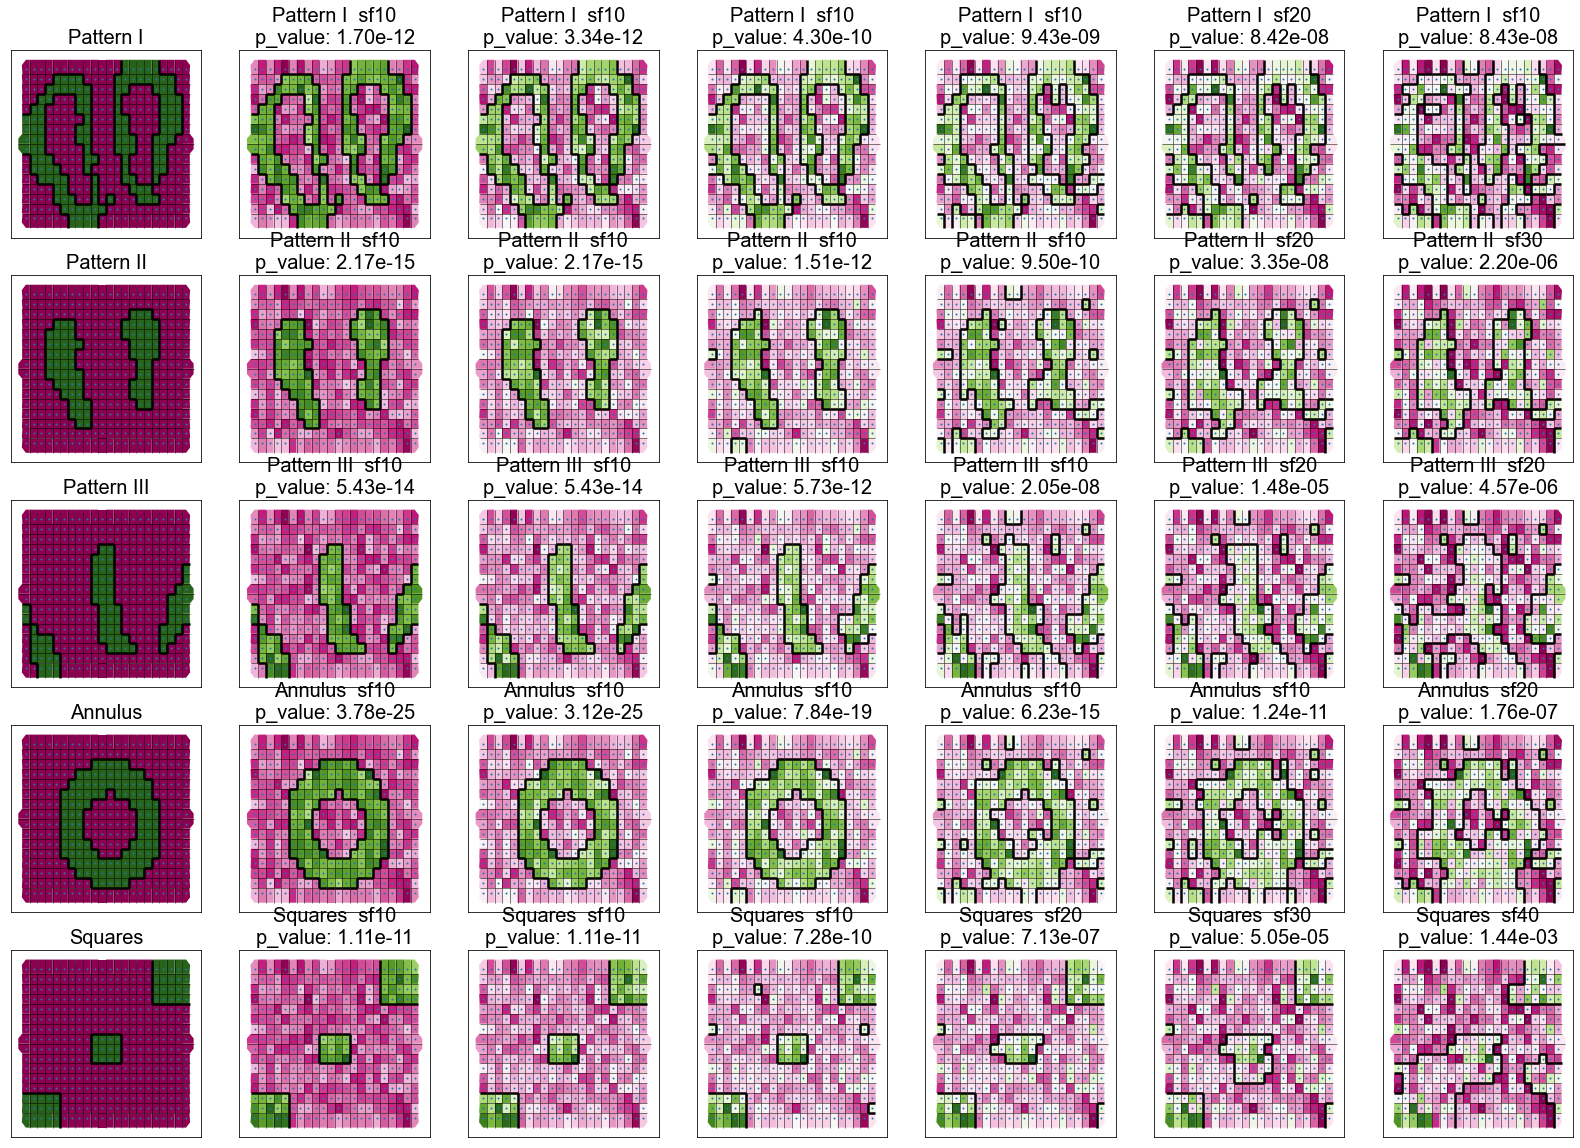

In [20]:
fig,ax =plt.subplots(5,7,figsize=(28,20))

exp_diff = 1
smooth_factor=20

sample_info_padding = pp.padding(sample_info)

locs = pp.locs





pp.set_mob_pattern(sample_info,tissue_mat,0)
c = pp.exp.astype("int")

axes=ax[0,0]
scGCO.subplot_voronoi_boundary("", locs, c, c , 0 ,ax=axes ,fdr=False, point_size=2,fontsize=20,set_title="Pattern I")

axes.set_xticks([])
axes.set_yticks([])

for i,sd_level in enumerate([0.1,0.2,0.3,0.4,0.5,0.6]):
    np.random.seed(0)
    axes= ax[0,i+1]
    exp = get_exp(c,exp_diff,sd_level)
    gmm = find_mixture_2_new(exp)
    cellGraph= scGCO.create_graph_with_weight(locs,exp)
    p_list=[]
    classlabel_list=[]
    
    p_best,node_best,newLabels_best,temp_factor_best,com_best, label_pred_best =scGCO.compute_single_gene_gmm(locs, exp, cellGraph, 
                                                                                                               gmm, smooth_factor=10)
    scGCO.subplot_voronoi_boundary("Pattern I  sf"+str(temp_factor_best), locs, exp, newLabels_best, min(p_best) ,ax=axes ,fdr=False, point_size=2,fontsize=20)
    axes.set_xticks([])
    axes.set_yticks([])


pp.set_mob_pattern(sample_info,tissue_mat,1)
c = pp.exp.astype("int")
axes= ax[1,0]
scGCO.subplot_voronoi_boundary("Pattern II", locs, c, c , 0 ,ax=axes ,fdr=False, point_size=2,fontsize=20,set_title="Pattern II")
axes.set_xticks([])
axes.set_yticks([])

for i,sd_level in enumerate([0.1,0.2,0.3,0.4,0.5,0.6]):
    np.random.seed(0)
    axes= ax[1,i+1]
    exp = get_exp(c,exp_diff,sd_level)
    gmm = find_mixture_2_new(exp)
    cellGraph= scGCO.create_graph_with_weight(locs,exp)
    p_list=[]
    classlabel_list=[]
    
    p_best,node_best,newLabels_best,temp_factor_best,com_best, label_pred_best =scGCO.compute_single_gene_gmm(locs, exp, cellGraph, 
                                                                                                               gmm, smooth_factor=10)
    scGCO.subplot_voronoi_boundary("Pattern II  sf"+str(temp_factor_best), locs, exp, newLabels_best, min(p_best) ,ax=axes ,fdr=False, point_size=2,fontsize=20)
    axes.set_xticks([])
    axes.set_yticks([])









## Pattern III
pp.set_mob_pattern_new(sample_info,tissue_mat,2)
c = pp.exp.astype("int")
axes=ax[2,0]
scGCO.subplot_voronoi_boundary("Pattern III", locs, c, c , 0 ,ax=axes ,fdr=False, point_size=2,fontsize=20,set_title="Pattern III")
axes.set_xticks([])
axes.set_yticks([])

for i,sd_level in enumerate([0.1,0.2,0.3,0.4,0.5,0.6]):
    np.random.seed(0)
    axes= ax[2,i+1]
    exp = get_exp(c,exp_diff,sd_level)
    gmm = find_mixture_2_new(exp)
    cellGraph= scGCO.create_graph_with_weight(locs,exp)
    p_list=[]
    classlabel_list=[]
    
    p_best,node_best,newLabels_best,temp_factor_best,com_best, label_pred_best =scGCO.compute_single_gene_gmm(locs, exp, cellGraph, 
                                                                                                               gmm, smooth_factor=10)
    scGCO.subplot_voronoi_boundary("Pattern III  sf"+str(temp_factor_best), locs, exp, newLabels_best, min(p_best) ,ax=axes ,fdr=False, point_size=2,fontsize=20)
    axes.set_xticks([])
    axes.set_yticks([])
    
    


    
    
    
pp.add_markdist_annulus(0,1)
c = pp.exp.astype("int")

axes=ax[3,0]
scGCO.subplot_voronoi_boundary("", locs, c, c , 0 ,ax=axes ,fdr=False, point_size=2,fontsize=20,set_title="Annulus")

axes.set_xticks([])
axes.set_yticks([])

for i,sd_level in enumerate([0.1,0.2,0.3,0.4,0.5,0.6]):
    np.random.seed(0)
    axes= ax[3,i+1]
    exp = get_exp(c,exp_diff,sd_level)
    gmm = find_mixture_2_new(exp)
    cellGraph= scGCO.create_graph_with_weight(locs,exp)
    p_list=[]
    classlabel_list=[]
    
    p_best,node_best,newLabels_best,temp_factor_best,com_best, label_pred_best =scGCO.compute_single_gene_gmm(locs, exp, cellGraph, 
                                                                                                               gmm, smooth_factor=10)
    scGCO.subplot_voronoi_boundary("Annulus  sf"+str(temp_factor_best), locs, exp, newLabels_best, min(p_best) ,ax=axes ,fdr=False, point_size=2,fontsize=20)
    axes.set_xticks([])
    axes.set_yticks([])
    

pp.add_markdist_squares(0,1)
c = pp.exp.astype("int")

axes=ax[4,0]
scGCO.subplot_voronoi_boundary("", locs, c, c , 0 ,ax=axes ,fdr=False, point_size=2,fontsize=20,set_title="Squares")

axes.set_xticks([])
axes.set_yticks([])

for i,sd_level in enumerate([0.1,0.2,0.3,0.4,0.5,0.6]):
    np.random.seed(0)
    axes= ax[4,i+1]
    exp = get_exp(c,exp_diff,sd_level)
    gmm = find_mixture_2_new(exp)
    cellGraph= scGCO.create_graph_with_weight(locs,exp)
    p_list=[]
    classlabel_list=[]
    
    p_best,node_best,newLabels_best,temp_factor_best,com_best, label_pred_best =scGCO.compute_single_gene_gmm(locs, exp, cellGraph, 
                                                                                                               gmm, smooth_factor=10)
    scGCO.subplot_voronoi_boundary("Squares  sf"+str(temp_factor_best), locs, exp, newLabels_best, min(p_best) ,ax=axes ,fdr=False, point_size=2,fontsize=20)
    axes.set_xticks([])
    axes.set_yticks([])
fig.savefig("../Figures/Simulation_grid_pattern_graph_cuts_vs_noise.pdf",font="pdf",dpi=300)   

In [14]:
pp=Points(400,1000)
locs = sample_info[["x","y"]].values
sample_info_padding=pp.padding(sample_info)
#normalizing_factor = sample_info_padding["total_counts"].values/np.median(sample_info_padding["total_counts"].values)
normalizing_factor = None
locs=pp.locs

def get_mu0(pattern,exp_diff,noise=0.2):
    high_exp=np.random.choice(range(2,5))
    low_exp= high_exp-exp_diff
    uu=[low_exp,high_exp]
    mu0=np.array([uu[i] for i in pattern])+np.random.normal(0,noise,len(pattern))
    mu0=np.clip(mu0,0,None)
    return mu0 

def get_mu2(pattern,exp_diff,noise=0.2):
    high_exp=np.random.choice(range(4,6))
    low_exp= high_exp-exp_diff
    uu=[low_exp,high_exp]
    mu0=np.array([uu[i] for i in pattern])+np.random.normal(0,noise,len(pattern))
    mu0=np.clip(mu0,0,None)
    return mu0 

def get_mu1(num_cells,noise=0.2):
    noise=np.random.choice(np.arange(0,noise,step=0.1))+0.1
    mean_exp=np.random.choice(range(3))
    mu1=np.tile(mean_exp,num_cells)+np.random.normal(0,noise,num_cells)
    mu1=np.clip(mu1,0,None)
    return mu1

def get_counts(mu,normalizing_factor=None):
    if normalizing_factor is None:
        normalizing_factor=np.ones(mu.shape[0])
    return (np.expm1(mu)*normalizing_factor+0.5).astype("int")

exp_diff=1
pattern = "squares"
num_genes = 1000
data_subset = pd.DataFrame(np.zeros((pp.numCell,1000)))

#pattern hotpot
#for noise in [0.1]:
for noise in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    for irep in range(1):
        np.random.seed(irep)
        exp_diff=1
        num_genes=1000
        data_subset=pd.DataFrame(np.zeros((pp.numCell,num_genes)))
        
        
        for i in range(0,50):
            pp.add_markdist_squares()
            #pp.set_mob_pattern_new(sample_info,tissue_mat,2,0.6)
            c = pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
            
        
        for i in range(50,100):
            #pp.add_markdist_circles(0,1)
            c= (1-pp.exp).astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        
        #gaussian noise
        for i in range(100,1000):
            mu1=get_mu1(data_subset.shape[0],noise=noise)
            data_subset.iloc[:,i]=get_counts(mu1,normalizing_factor)
        data_subset.columns=["gene"+str(i+1) for i in range(num_genes)]
        df=data_subset.copy()
        df.index=[*map(lambda x:str(x[0])+"x"+str(x[1]),locs)]
        ff="../processed_data/sim_" + pattern + "_expdiff"+str(exp_diff)+"_noise"+str(noise)+"_counts"+str(irep)+".csv"
        df.to_csv(ff)

In [ ]:
pp=Points(400,1000)
locs = sample_info[["x","y"]].values
sample_info_padding=pp.padding(sample_info)
#normalizing_factor = sample_info_padding["total_counts"].values/np.median(sample_info_padding["total_counts"].values)
normalizing_factor = None
locs=pp.locs

def get_mu0(pattern,exp_diff,noise=0.2):
    high_exp=np.random.choice(range(2,5))
    low_exp= high_exp-exp_diff
    uu=[low_exp,high_exp]
    mu0=np.array([uu[i] for i in pattern])+np.random.normal(0,noise,len(pattern))
    mu0=np.clip(mu0,0,None)
    return mu0 

def get_mu2(pattern,exp_diff,noise=0.2):
    high_exp=np.random.choice(range(4,6))
    low_exp= high_exp-exp_diff
    uu=[low_exp,high_exp]
    mu0=np.array([uu[i] for i in pattern])+np.random.normal(0,noise,len(pattern))
    mu0=np.clip(mu0,0,None)
    return mu0 

def get_mu1(num_cells,noise=0.2):
    noise=np.random.choice(np.arange(0,noise,step=0.1))+0.1
    mean_exp=np.random.choice(range(3))
    mu1=np.tile(mean_exp,num_cells)+np.random.normal(0,noise,num_cells)
    mu1=np.clip(mu1,0,None)
    return mu1

def get_counts(mu,normalizing_factor=None):
    if normalizing_factor is None:
        normalizing_factor=np.ones(mu.shape[0])
    return (np.expm1(mu)*normalizing_factor+0.5).astype("int")

exp_diff=1
num_genes=10000
data_subset=pd.DataFrame(np.zeros((pp.numCell,10000)))

#pattern1
for noise in [0.4]:
#for noise in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    for irep in range(1):
        np.random.seed(irep)
        exp_diff=1
        num_genes=10000
        data_subset=pd.DataFrame(np.zeros((pp.numCell,10000)))
        
        
        for i in range(0,50):
            pp.add_markdist_hotpot(0,1)
            c= pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        for i in range(50,100):
            #pp.add_markdist_circles(0,1)
            c= (1-pp.exp).astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        for i in range(100,150):
            pp.add_markdist_streak(0,1)
            c= pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        
        for i in range(150,200):
            #pp.add_markdist_circles(0,1)
            c= (1-pp.exp).astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
            
        
        for i in range(200,250):
            pp.add_markdist_streaks(0,1)
            c= pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        
        for i in range(250,300):
            #pp.add_markdist_circles(0,1)
            c= (1-pp.exp).astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
            
        for i in range(300,350):
            pp.add_markdist_annulus(0,1)
            c= pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
            
        for i in range(350,400):
            #pp.add_markdist_streaks(0,1)
            c= (1-pp.exp).astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
            
        for i in range(400,450):
            pp.add_markdist_squares(0,1)
            c= pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        for i in range(450,500):
            #pp.add_markdist_circles(0,1)
            c= (1-pp.exp).astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)

#         for i in range(400,500):
#             pp.add_markdist_annulus(0,1)
#             c= pp.exp.astype("int")
#             mu0=get_mu0(c,exp_diff,noise)
#             data_subset.iloc[:,i]=get_counts(mu0)
        
#         for i in range(500,600):
#             #pp.add_markdist_annuluses(0,1)
#             c= (1-pp.exp).astype("int")
#             mu0=get_mu0(c,exp_diff,noise)
#             data_subset.iloc[:,i]=get_counts(mu0)

        for i in range(500,600):
            #c= np.concatenate([tissue_mat[0],np.zeros(pp.locs.shape[0]-tissue_mat.shape[1])])
            pp.set_mob_pattern(sample_info,tissue_mat,0)
            pattern1 = pp.exp
            c = pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
            
        for i in range(600,800):
            #c=np.concatenate([tissue_mat[1],np.zeros(pp.locs.shape[0]-tissue_mat.shape[1])])
            #pp.set_pattern(c)
            pp.set_mob_pattern(sample_info,tissue_mat,1)
            pattern2 = pp.exp
            c = pp.exp.astype("int")
            mu0=get_mu2(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        for i in range(800,900):
            #c=np.concatenate([tissue_mat[2],np.zeros(pp.locs.shape[0]-tissue_mat.shape[1])])
            pp.set_mob_pattern_new(sample_info,tissue_mat,2,0.6)
            pattern3 = pp.exp
            pp.set_pattern(c)
            #c = pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor)
        
        for i in range(900,1000):
            c= pattern1 + pattern2 + pattern3
            c[c>1]=1
            pp.set_pattern(1-c)
            c = pp.exp.astype("int")
            mu0=get_mu0(c,exp_diff,noise)
            data_subset.iloc[:,i]=get_counts(mu0,normalizing_factor) 
        #gaussian noise
        for i in range(1000,10000):
            mu1=get_mu1(data_subset.shape[0],noise=noise)
            data_subset.iloc[:,i]=get_counts(mu1,normalizing_factor)
        data_subset.columns=["gene"+str(i+1) for i in range(10000)]
        df=data_subset.copy()
        df.index=[*map(lambda x:str(x[0])+"x"+str(x[1]),locs)]
        ff="../processed_data/sim_mob_grid_expdiff"+str(exp_diff)+"_noise"+str(noise)+"_counts"+str(irep)+".csv"
        df.to_csv(ff)